In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

# Data and its source
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

# Outcome of interest
How accurate we can detect and predict fraud.

# Using this credit card fraud dataset develop an algorithm to predict fraud. 

# Prioritize, correctly finding fraud rather than correctly labeling non-fraudulent transactions.

## https://www.kaggle.com/mlg-ulb/creditcardfraud

In [4]:
# Replace the path with the correct path for your data.
data1 = pd.read_csv('creditcard.csv')#,skipinitialspace=True,header=1)

In [5]:
print('This data frame has {} rows and {} columns.'.format(data1.shape[0], data1.shape[1]))

This data frame has 284807 rows and 31 columns.


In [6]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
##numerical summary -> only non-anonymized columns of interest
#this data has not been transformed via PCA.
#Time means the time elapsed between the first transation and the current one, 
#the amount column means the dollar about loss. 
pd.set_option('precision', 3)
data1.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


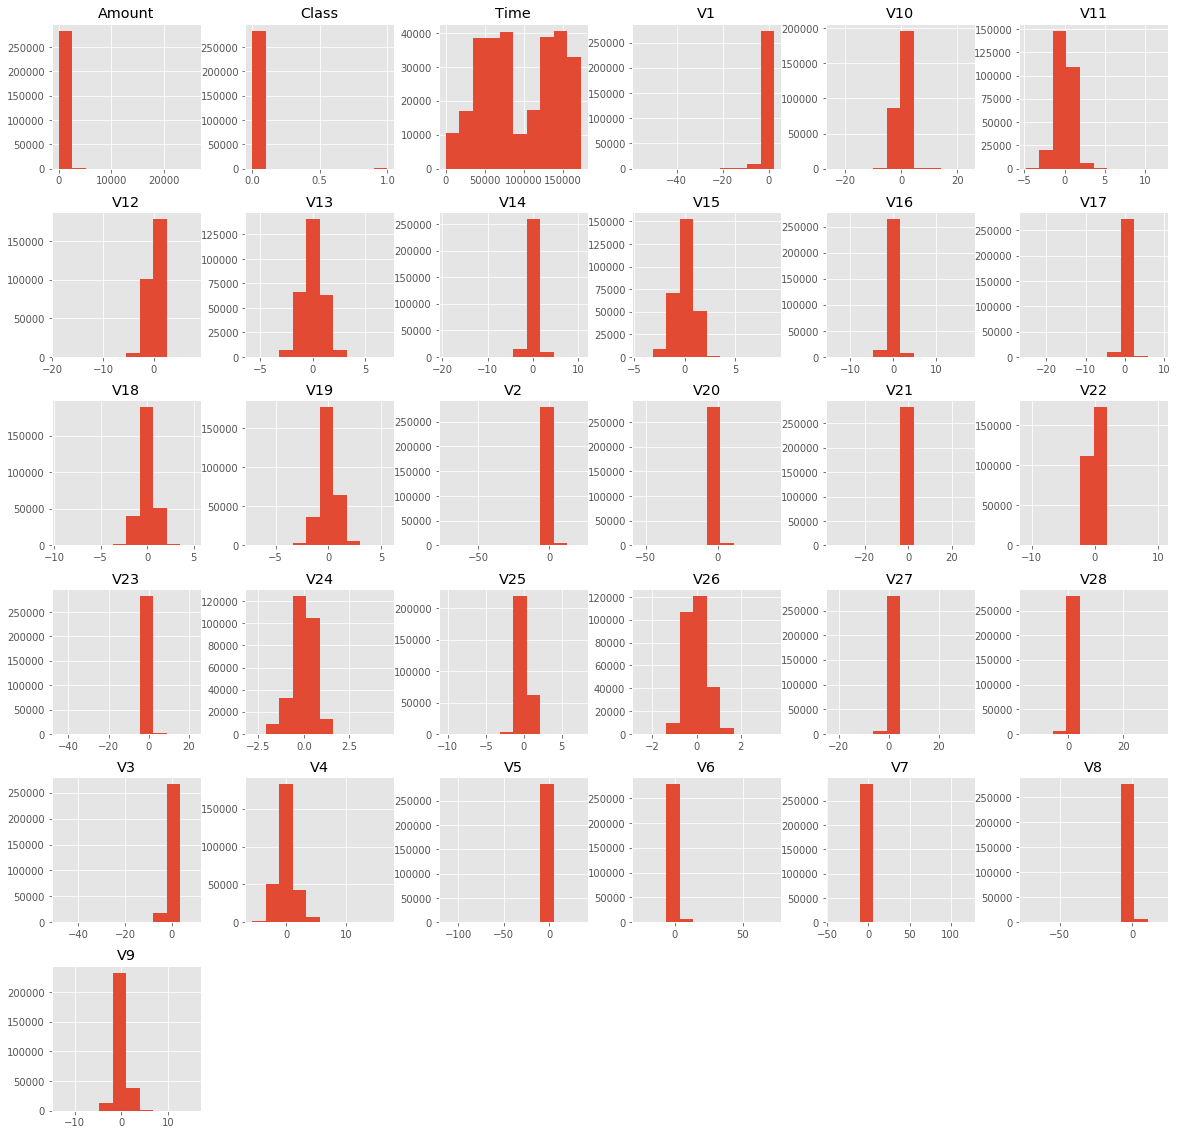

In [9]:
#Using histograms to show if there are any unusual parameters.
data1.hist(figsize = (20, 20))
plt.show()

In [10]:
# Determine number of fraud cases in dataset
# by seperating fraudulent and valid
Fraud = data1[data1['Class'] == 1]
Valid = data1[data1['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


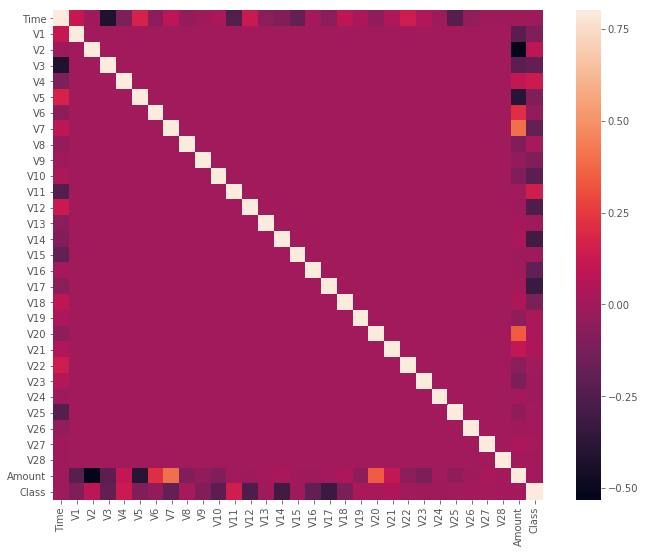

In [12]:
#Building a correlation matrix, do we need to remove anything? 
#If there are stong linear relationships we can use linear methods...
# This shows us which parameters are important for our class.
# We see some variations below which reveals that we will be able to make some decent predictions
corrmat = data1.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [13]:
# Polishing up formatting before machine learning 
#Get all the columns from the dataFrame
columns = data1.columns.tolist()

# Filter the columns to remove data we do not want
columns =[c for c in columns if c not in ["Class"]]

#Store the variable we'll be predicting on 
target = "Class"

X = data1[columns]
Y = data1[target]

# Print shapes
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


So that we know what we are working with, 30 columns in X, Y is a one dimentional array, class labels for all data points in dataset.

We are going to use Isolation forrest algo
local outlier factor algo
 
 
 import preprocessed and explored our dataset for applying our algos

In [16]:
# Applying algorithims to the dataset for Anomoly detection 
# 0 valid transaction and 1 fraud

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
#Unsupervised outlier detection method
from sklearn.neighbors import LocalOutlierFactor

#define random states
state = 1

#define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                       contamination=outlier_fraction,
                                       random_state=state),
    "Local Outlier Factor": LocalOutlierFactor
    (n_neighbors=20,
    contamination=outlier_fraction)
}

In [18]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    # Reshape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred == 1] =0
    y_pred[y_pred == -1] =1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/Users/bradleyrhyins/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/bradleyrhyins/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 645
0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



<Figure size 648x504 with 0 Axes>

Precision account for false positives and recall account for false negatives.
The precision score is good enough for us becasue it shows a decent number 34% of actual fraudulent cases are being labled correctly as fraudulent cases. Additionally the number for false negative(recall) is a decent number at 35%. 

I think that the Isolation forrest did a better job with processing such a large dataset since it yeilded a better f1-score(a combinaiton of precision and recall) at 35%. Which means that the we are going to detect the fraudulent transactions 35% of the time. 